Importing Libraries 
for predicting the house price 
(supervise ml)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [4]:
df = pd.read_csv('boston.csv')

In [5]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.tail(506)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
current_columns = df.columns

#to rename last column

new_columns = list(current_columns[:-1]) + ['price']

df.columns = new_columns

In [8]:
df.shape

(506, 15)

In [9]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'price'],
      dtype='object')

In [10]:
df.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
price         float64
dtype: object

In [11]:
df.isnull()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.describe() 

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.nunique()

Unnamed: 0    506
crim          504
zn             26
indus          76
chas            2
nox            81
rm            446
age           356
dis           412
rad             9
tax            66
ptratio        46
black         357
lstat         455
price         229
dtype: int64

In [14]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
price         0
dtype: int64

In [15]:
df.corr

<bound method DataFrame.corr of      Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     ta

<Axes: >

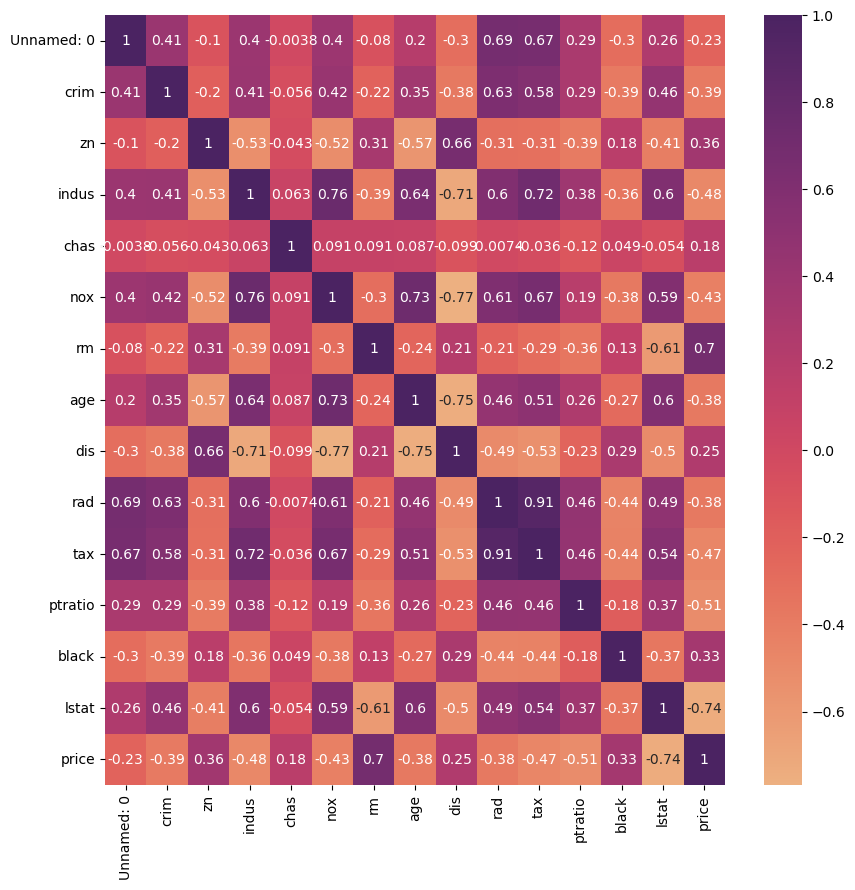

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap='flare')

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per \$10000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV renamed t - Median value of owner-occupied homes in \$1000's

<Figure size 3000x3000 with 0 Axes>

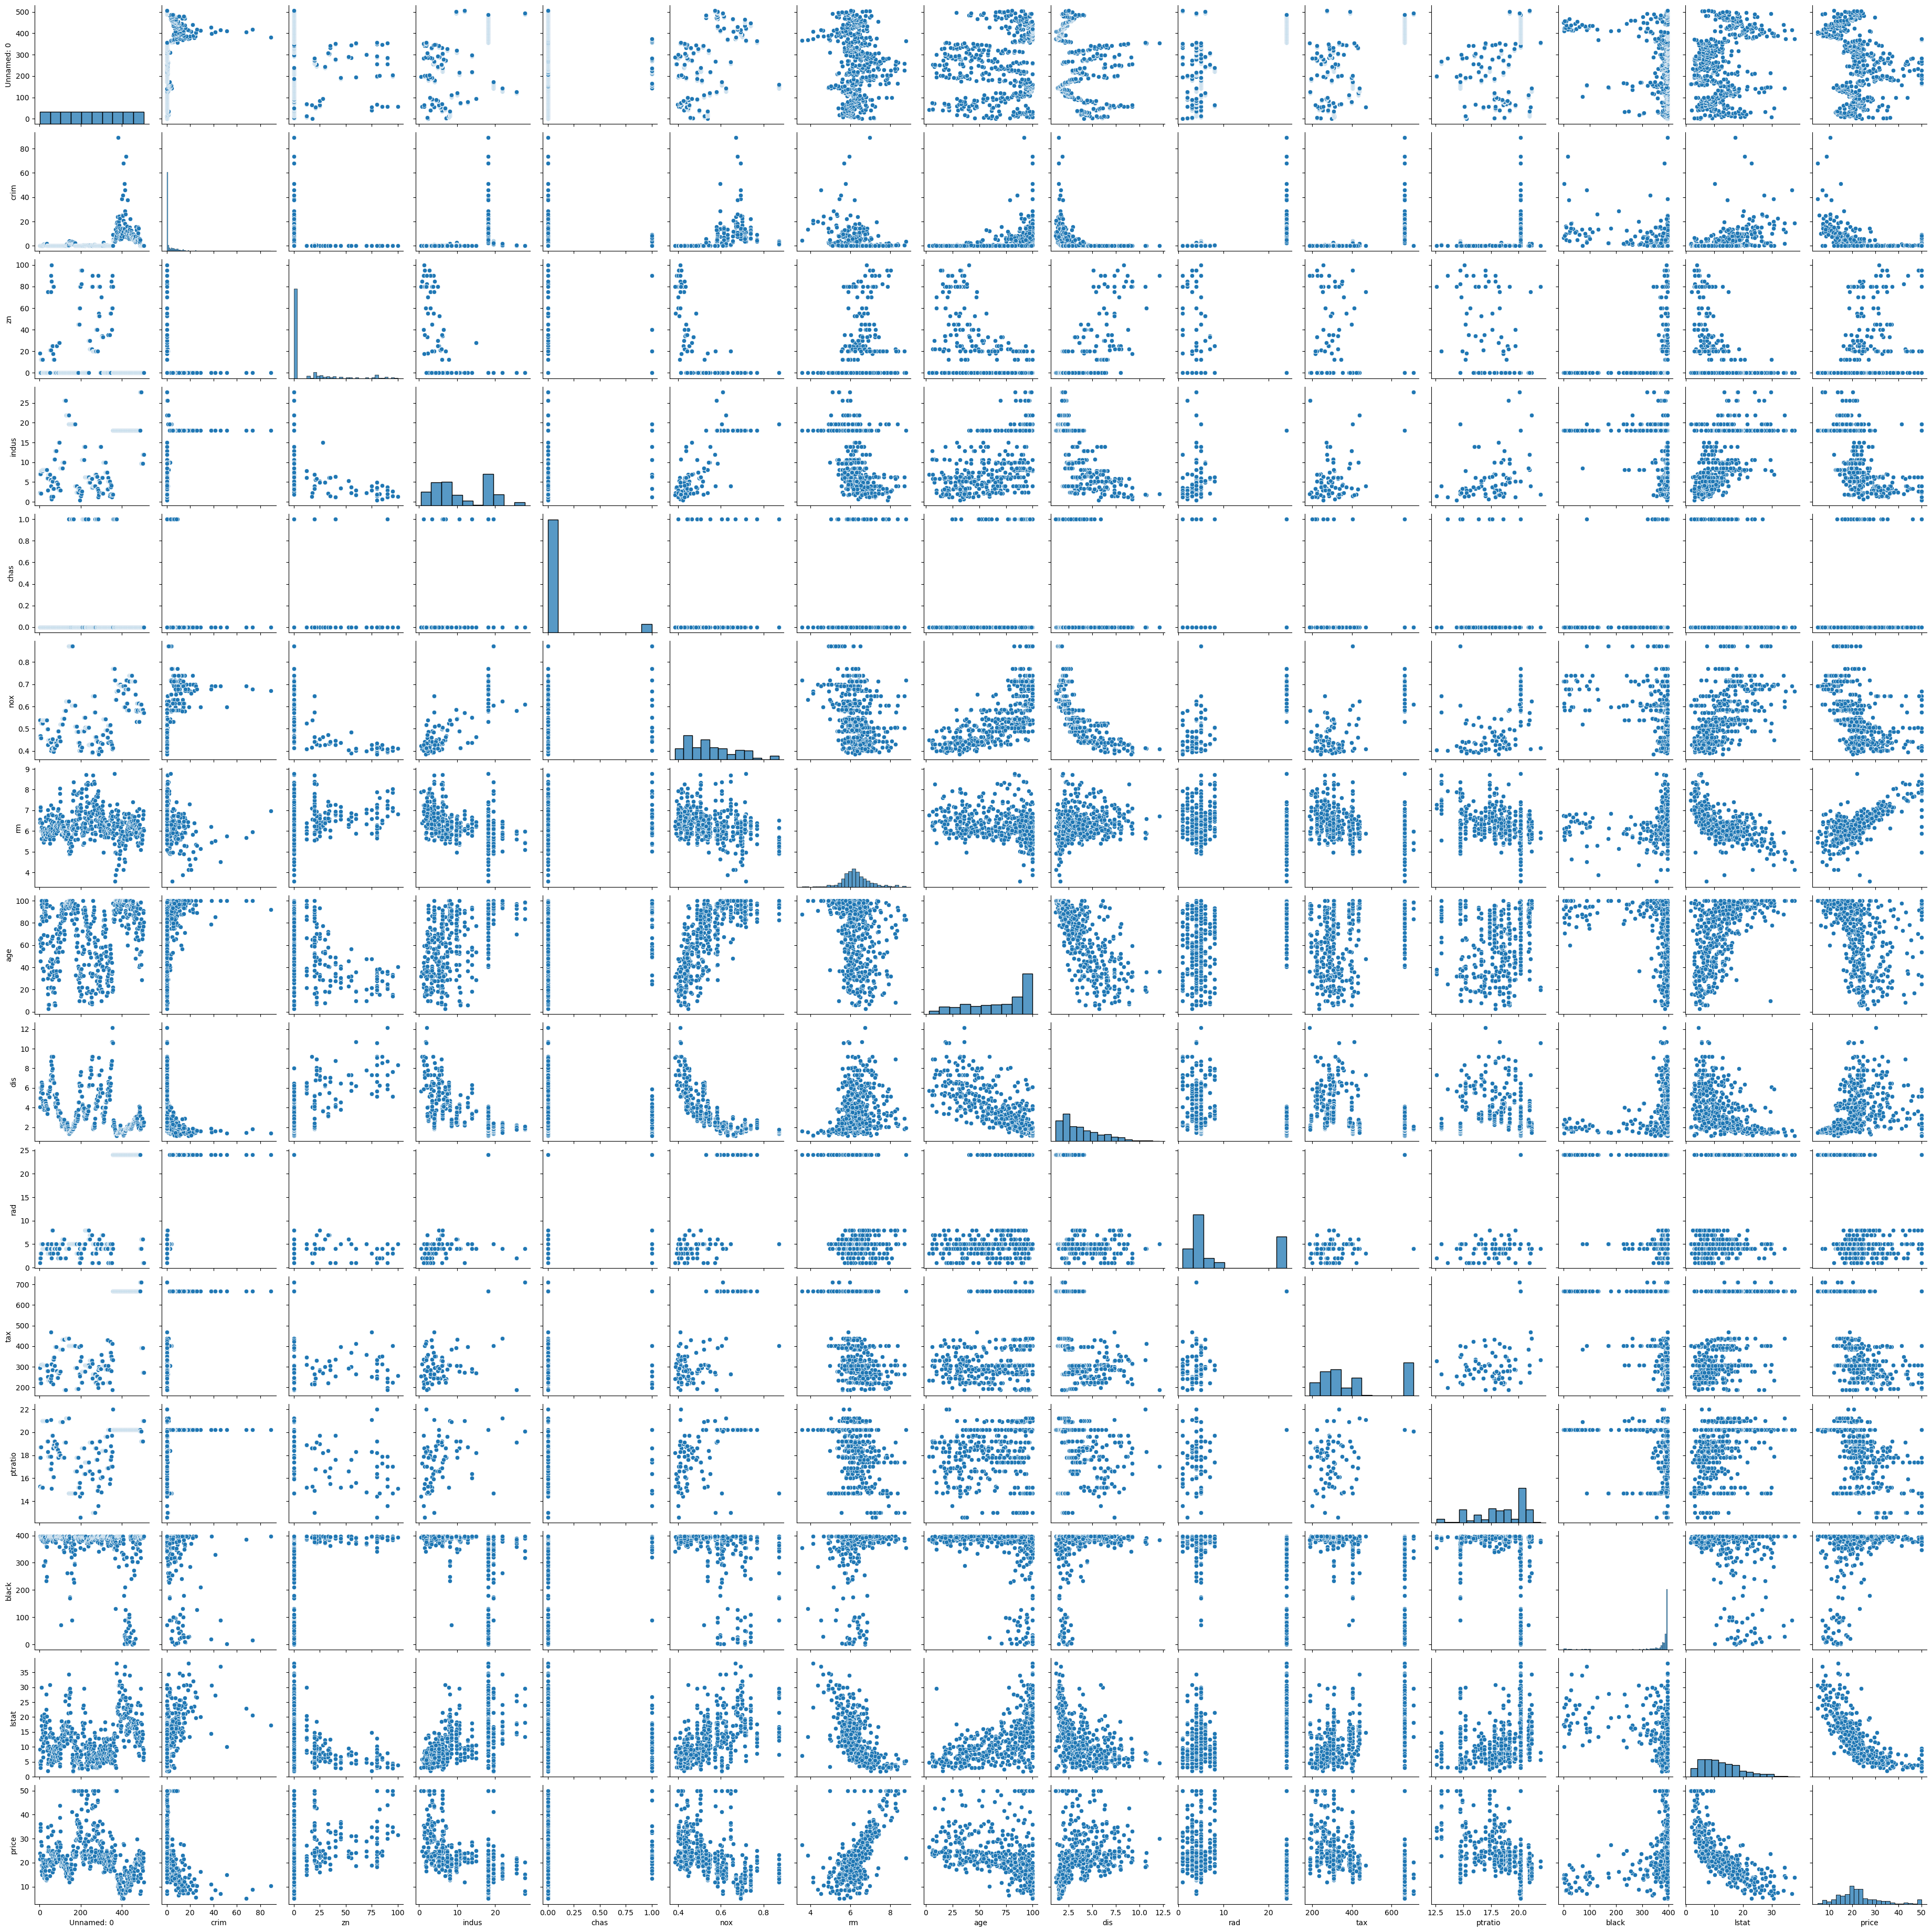

In [17]:
plt.figure(figsize=(30, 30))
sns.pairplot(df)
plt.show()

<Axes: >

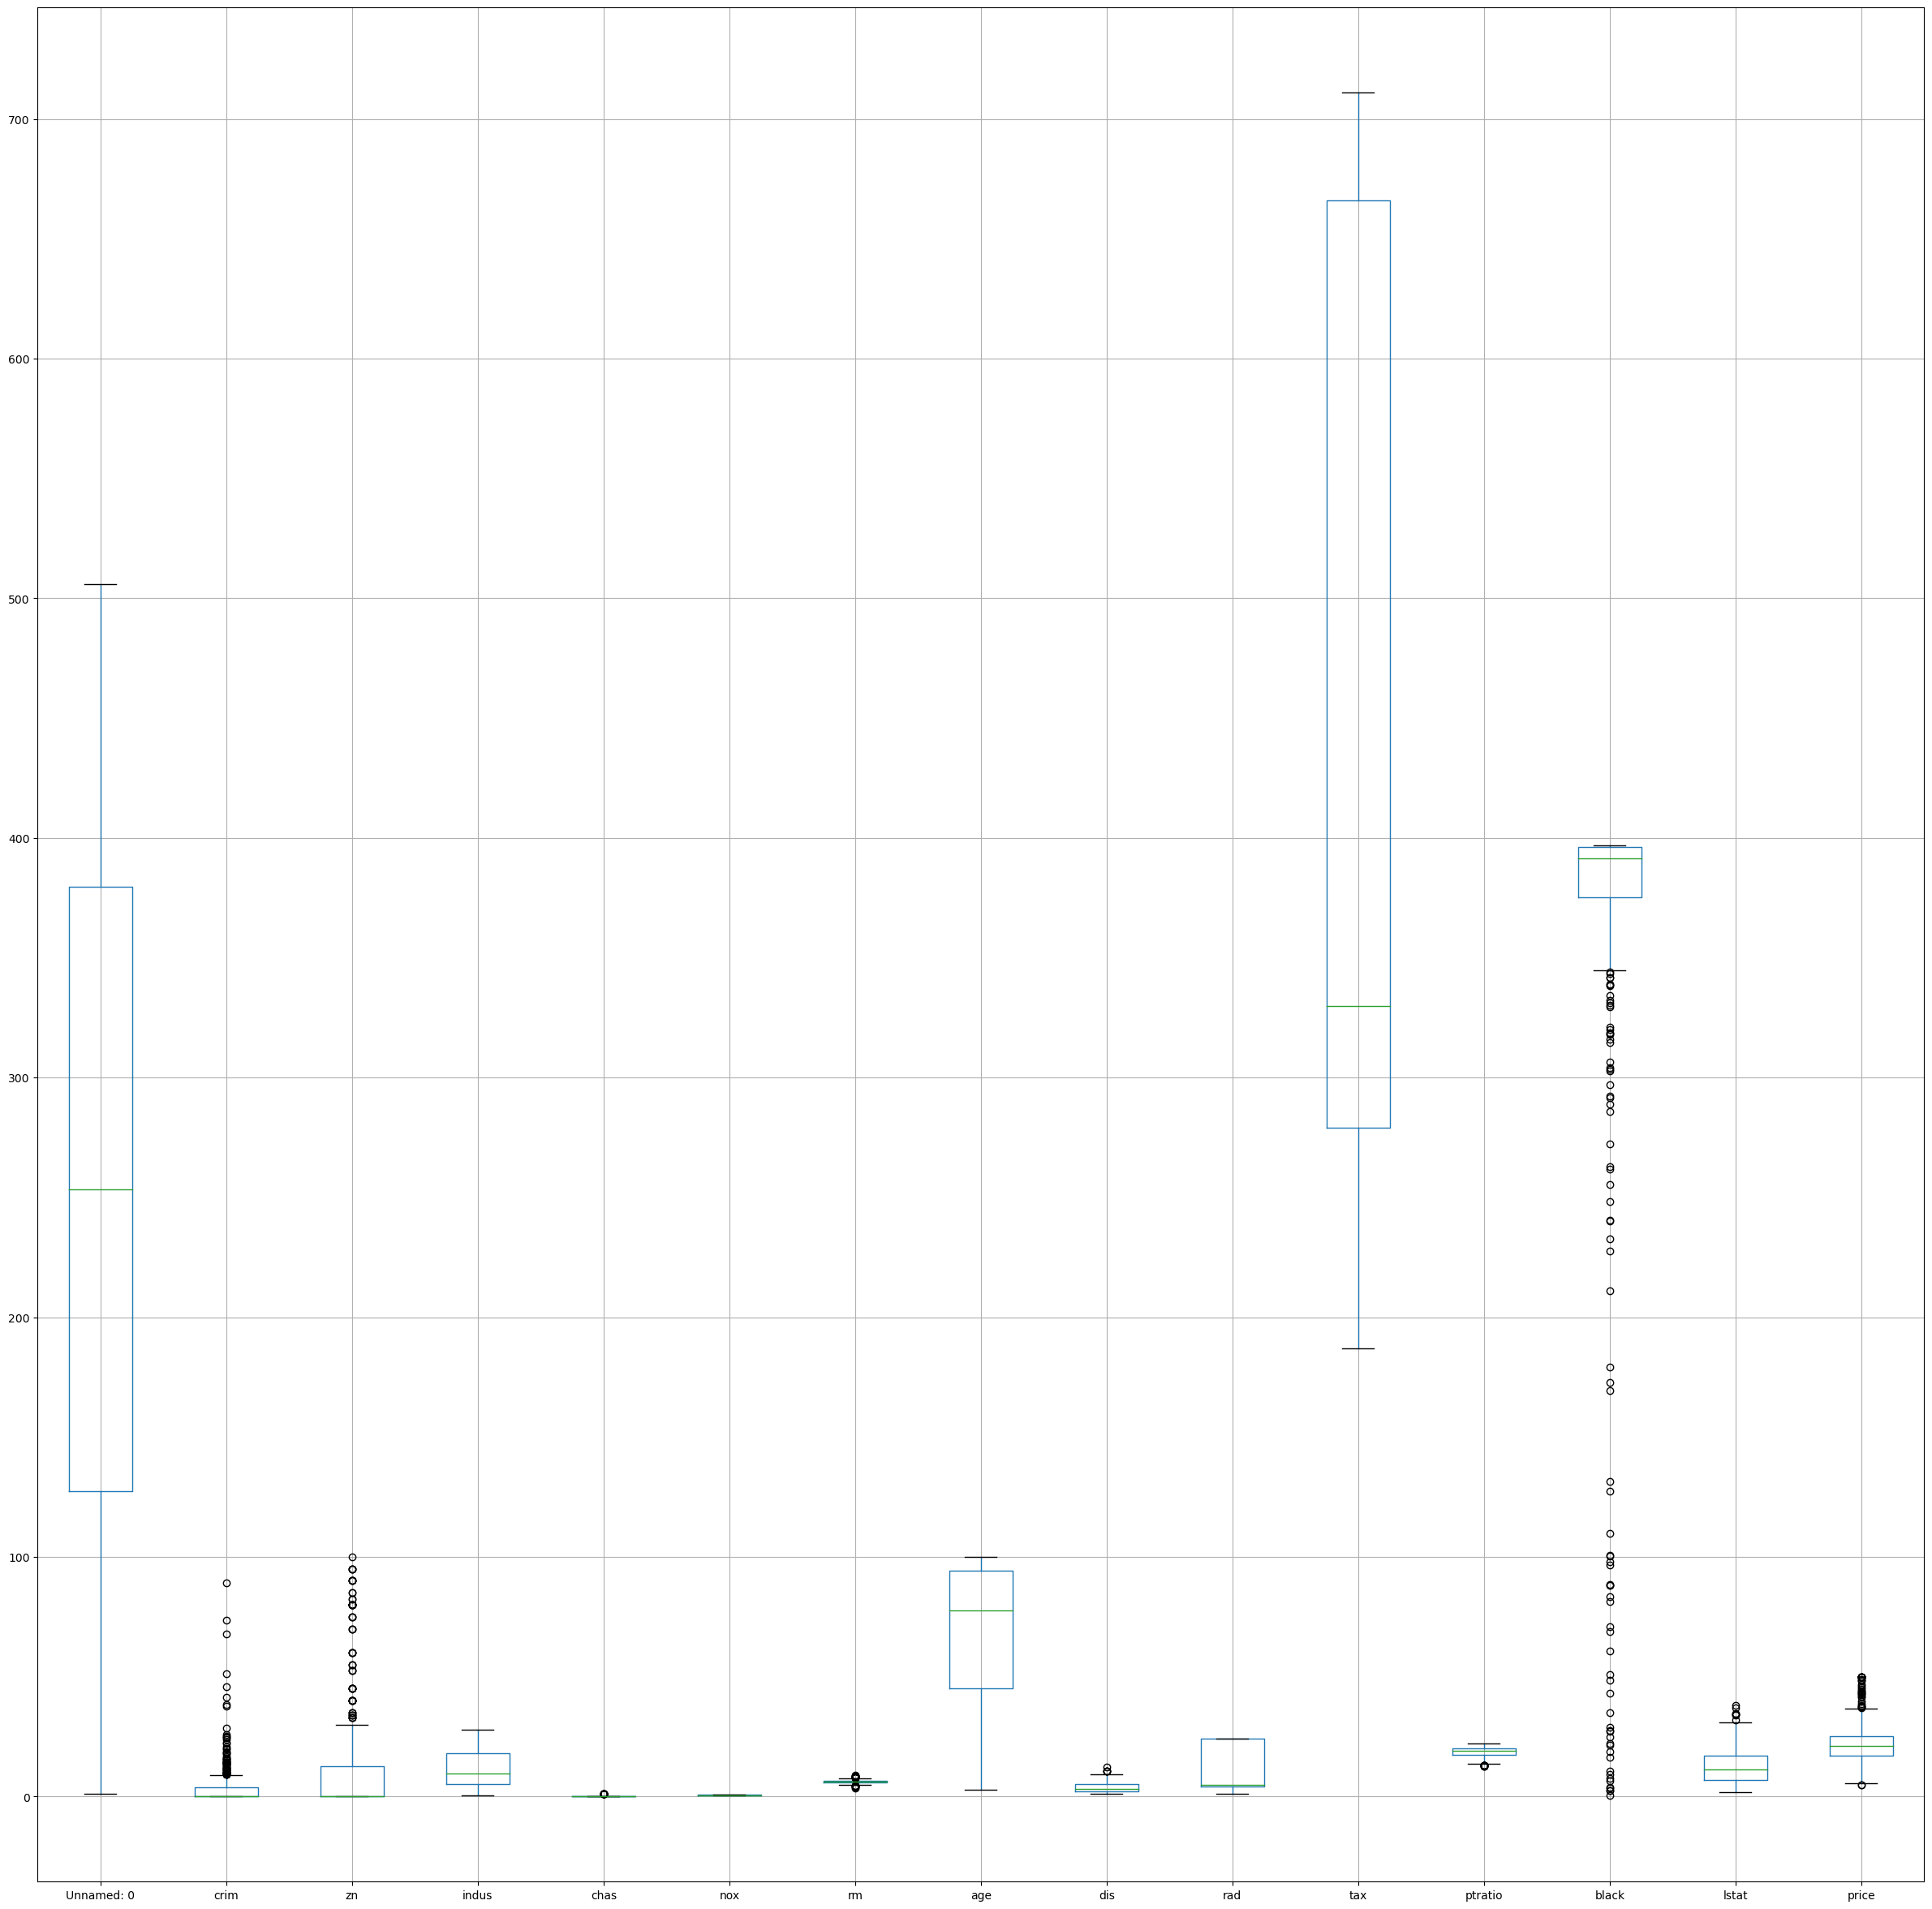

In [18]:
plt.figure(figsize=(30, 30))
df.boxplot()

#plots percentile

In [19]:
df.price.min()

5.0

In [20]:
df.price.max()

50.0

In [21]:
df.price.std()

9.19710408737982

In [22]:
x = np.array(df.drop('price', axis=1))
y = np.array(df.price)

#X = DATA
#Y = TARGET

In [23]:
model=LinearRegression()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
len(x_train)

404

In [26]:
len(y_train)

404

In [27]:
len(x_test)

102

In [28]:
len(y_test)

102

In [29]:
model=LinearRegression()

In [30]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
model.intercept_

30.412686521180273

In [32]:
model.coef_

array([-3.47490827e-03, -1.13313604e-01,  3.23067056e-02,  4.35516844e-02,
        2.75621916e+00, -1.69386529e+01,  4.48663161e+00, -1.09175430e-02,
       -1.47608119e+00,  2.92666304e-01, -9.92202267e-03, -9.11544575e-01,
        1.24202332e-02, -5.12262693e-01])

In [33]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [34]:
y_pred = model.predict(x_test)

In [35]:
y_pred

array([28.97335364, 35.87795794, 13.97366183, 25.61583978, 18.66608153,
       23.64466022, 17.05971239, 14.5264485 , 22.79402759, 19.60618783,
       24.62043501, 19.06428675, -6.27197735, 22.20788474, 18.64849181,
       26.15022718, 20.62835191,  5.77374284, 40.72117979, 17.48530737,
       27.08436097, 29.90818637, 11.65330429, 22.99879937, 17.85048447,
       15.5556251 , 23.31650588, 14.44013189, 22.11106256, 18.20109763,
       22.33391113, 24.79774986, 26.15304018, 17.89425941, 16.52927207,
       17.10592481, 31.77372627, 19.58243073, 23.603617  , 25.2202457 ,
       12.89702838, 31.91216634, 42.90231353, 17.74616574, 27.5000776 ,
       17.06259552, 14.39460992, 26.51167547, 20.10908837, 30.51587021,
       21.74636797, 34.09117218, 16.44234996, 26.62572161, 39.42027423,
       22.49131562, 18.75511558, 32.62323592, 25.35325167, 12.58127149,
       23.23090959, 31.15654212, 31.70938821, 16.555899  , 19.75136599,
       16.30198537, 20.60703158, 26.4253367 , 31.3483927 , 11.44

In [36]:
model.score(x_test,y_test)

0.6659408703343028

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

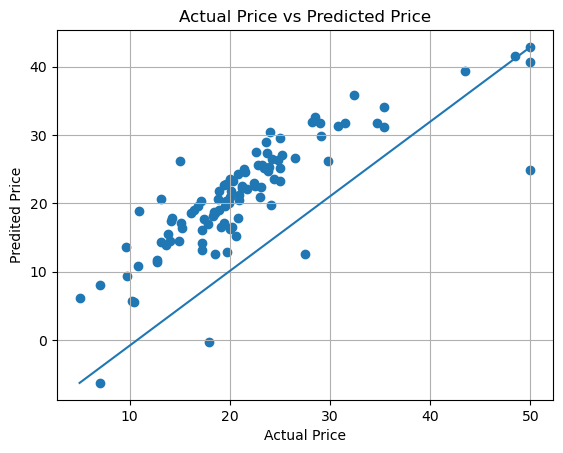

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predited Price")
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)])
plt.title('Actual Price vs Predicted Price')


In [38]:
r2_score(y_test,y_pred)

0.6659408703343028

In [39]:
mean_squared_error(y_test,y_pred)

24.497819777630447